In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, accuracy_score, recall_score, roc_curve, precision_recall_curve, auc
from sklearn.tree import DecisionTreeClassifier
# import warnings

Using TensorFlow backend.


In [2]:
data = pd.read_csv("insurance_claims.csv")
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
data.shape

(1000, 40)

In [4]:
# Dropping columns 
data.drop('_c39',axis=1,inplace=True)

In [5]:
# data.isnull().sum()

Text(0, 0.5, 'Number of customers')

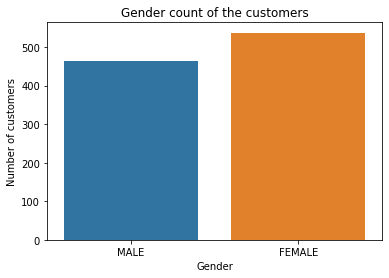

In [6]:
sns.countplot(data.insured_sex)
plt.title("Gender count of the customers")
plt.xlabel("Gender")
plt.ylabel("Number of customers")

Text(0, 0.5, 'Number of responses')

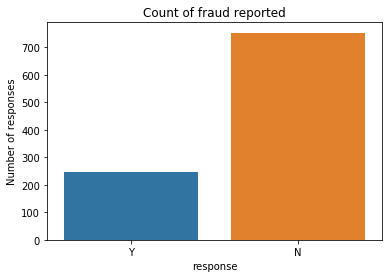

In [7]:
sns.countplot(data.fraud_reported)
plt.title("Count of fraud reported")
plt.xlabel("response")
plt.ylabel("Number of responses")

Text(0, 0.5, 'Number of customers')

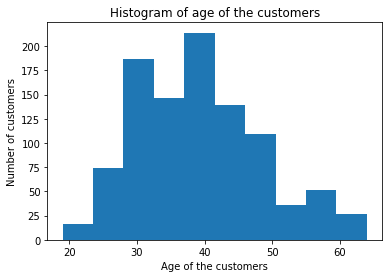

In [8]:
plt.hist(data.age)
plt.title("Histogram of age of the customers")
plt.xlabel("Age of the customers")
plt.ylabel("Number of customers")

In [9]:
from sklearn import preprocessing

In [10]:
#lets do Lable enconding coding to make more features 
le = preprocessing.LabelEncoder()
le_count = 0

# Iterate through the columns
for col in data:
    if data[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(data[col].unique())) <= 2:
            # Train on the training data
            le.fit(data[col])
            # Transform both training and testing data
            data[col] = le.transform(data[col])
            
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

2 columns were label encoded.


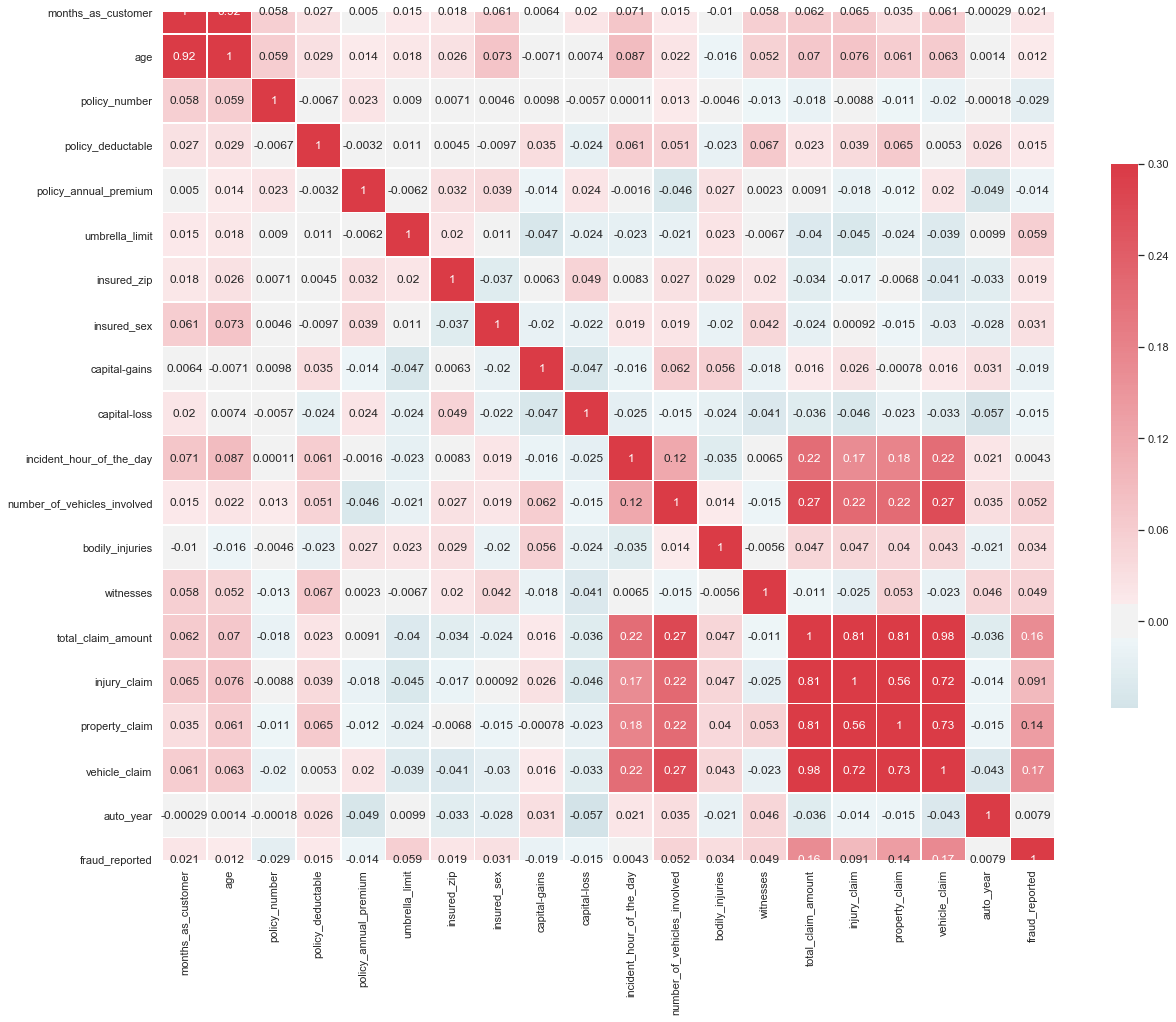

In [11]:
#data = pd.get_dummies(data)
#print('Training Features shape: ', data.shape)
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20,20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(data.corr(), cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [12]:
# data['auto_model'].nunique()
# data['policy_bind_date']
# data['policy_csl']
# data["incident_location"].nunique()
# data["incident_city"].nunique()
# data["incident_state"].nunique()
# data['insured_occupation'].nunique()

In [13]:
drop_columns = ["policy_number","auto_model", "policy_bind_date", "policy_state", "incident_date",
               "incident_state", "incident_city", "incident_location"]

data = data.drop(drop_columns, axis=1)

In [14]:
data['insured_hobbies'].unique()

array(['sleeping', 'reading', 'board-games', 'bungie-jumping',
       'base-jumping', 'golf', 'camping', 'dancing', 'skydiving',
       'movies', 'hiking', 'yachting', 'paintball', 'chess', 'kayaking',
       'polo', 'basketball', 'video-games', 'cross-fit', 'exercise'],
      dtype=object)

In [15]:
data.select_dtypes(include='object')

,policy_csl,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,auto_make
0,250/500,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES,Saab
1,250/500,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,?,Minor Damage,Police,?,?,Mercedes
2,100/300,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO,Dodge
3,250/500,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,?,NO,Chevrolet
4,500/1000,Associate,sales,board-games,unmarried,Vehicle Theft,?,Minor Damage,None,NO,NO,Accura
...,...,...,...,...,...,...,...,...,...,...,...,...
995,500/1000,Masters,craft-repair,paintball,unmarried,Single Vehicle Collision,Front Collision,Minor Damage,Fire,YES,?,Honda
996,100/300,PhD,prof-specialty,sleeping,wife,Single Vehicle Collision,Rear Collision,Major Damage,Fire,YES,?,Volkswagen
997,250/500,Masters,armed-forces,bungie-jumping,other-relative,Multi-vehicle Collision,Side Collision,Minor Damage,Police,?,YES,Suburu
998,500/1000,Associate,handlers-cleaners,base-jumping,wife,Single Vehicle Collision,Rear Collision,Major Damage,Other,?,YES,Audi


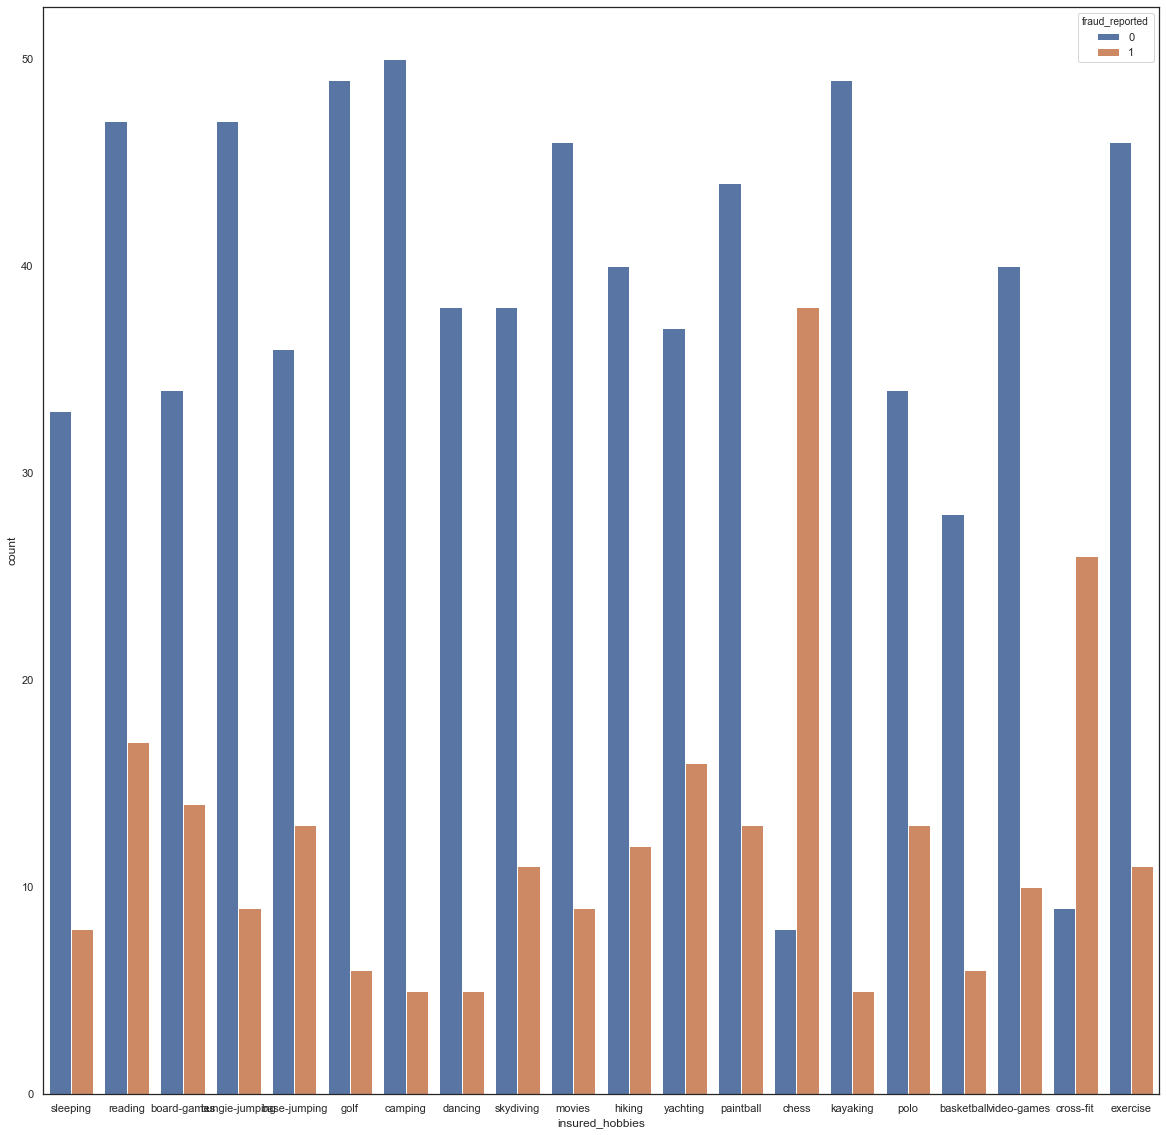

In [16]:
f, ax = plt.subplots(figsize=(20, 20))
sns.countplot(x='insured_hobbies',hue='fraud_reported',data=data)

In [17]:
predictors = data.iloc[:,:-1]
response = data.iloc[:, -1]

In [18]:
categorical_data = predictors.select_dtypes(exclude="number")
categorical_predictors = categorical_data.columns

predictors = predictors.drop(categorical_predictors, axis=1)

In [19]:
one_hot_data = pd.get_dummies(categorical_data)
predictors = predictors.join(one_hot_data)

predictor_columns = predictors.columns
response_columns = response

In [20]:
sm = SMOTE(random_state=24)
predictors, response = sm.fit_resample(predictors, response)

In [21]:
# response.shape
# predictors.shape

In [22]:
predictors = pd.DataFrame(predictors, columns=predictor_columns)
response = pd.Series(response)

In [23]:
predictors_train, predictors_test, response_train, response_test = train_test_split(predictors,response,test_size=0.3)

In [24]:
model_preds = {}

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


*****************************************
Results on testing data:
*****************************************
Accuracy = 0.5597345132743363
Precision = 0.6727272727272727
Recall = 0.5381818181818182

AUC value = 0.5657010785824345


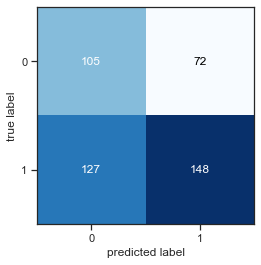

In [25]:
model = LogisticRegression()
model.fit(predictors_train, response_train)
predictions_test = model.predict(predictors_test)
predictions_train = model.predict(predictors_train)

conf_matrix = confusion_matrix(predictions_test, response_test)
plot_confusion_matrix(conf_matrix)

precision = precision_score(predictions_test, response_test)
recall = recall_score(predictions_test, response_test)

print("*****************************************")
print("Results on testing data:")
print("*****************************************")
print("Accuracy = "+str(accuracy_score(predictions_test, response_test)))
print("Precision = "+str(precision))
print("Recall = "+str(recall))

tpr, fpr, threshold = roc_curve(predictions_test, response_test, pos_label=1)
model_preds["Logistic Regression"] = [tpr, fpr]
print()
print("AUC value = "+str(auc(tpr, fpr)))

*****************************************
Results on testing data:
*****************************************
Accuracy = 0.6460176991150443
Precision = 0.7818181818181819
Recall = 0.6056338028169014

AUC value = 0.659959758551308


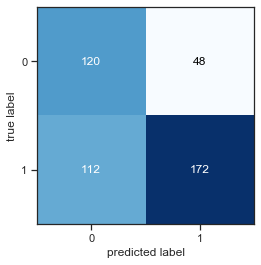

In [26]:
knn = KNeighborsClassifier()
knn.fit(predictors_train, response_train)

predictions_train = knn.predict(predictors_train)
predictions_test = knn.predict(predictors_test)

conf_matrix = confusion_matrix(predictions_test, response_test)
plot_confusion_matrix(conf_matrix)

precision = precision_score(predictions_test, response_test)
recall = recall_score(predictions_test, response_test)

print("*****************************************")
print("Results on testing data:")
print("*****************************************")
print("Accuracy = "+str(accuracy_score(predictions_test, response_test)))
print("Precision = "+str(precision))
print("Recall = "+str(recall))

tpr, fpr, threshold = roc_curve(predictions_test, response_test, pos_label=1)
model_preds["K Nearest Neighbor"] = [tpr, fpr]
print()
print("AUC value = "+str(auc(tpr, fpr)))

*****************************************
Results on testing data:
*****************************************
Accuracy = 0.838495575221239
Precision = 0.8636363636363636
Recall = 0.8154506437768241

AUC value = 0.8392321712034806


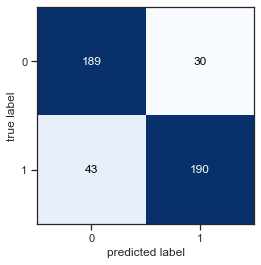

In [27]:
## Since it has a lot of categorical variables and the dataset is also not huge we 
## will use decision trees to get more accuracy.

predictors_train, predictors_test, response_train, response_test = train_test_split(predictors,response,test_size=0.3)

tree = DecisionTreeClassifier()
tree.fit(predictors_train, response_train)
predictions_test = tree.predict(predictors_test)
predictions_train = tree.predict(predictors_train)

conf_matrix = confusion_matrix(predictions_test, response_test)
plot_confusion_matrix(conf_matrix)

precision = precision_score(predictions_test, response_test)
recall = recall_score(predictions_test, response_test)

print("*****************************************")
print("Results on testing data:")
print("*****************************************")
print("Accuracy = "+str(accuracy_score(predictions_test, response_test)))
print("Precision = "+str(precision))
print("Recall = "+str(recall))

tpr, fpr, threshold = roc_curve(predictions_test, response_test, pos_label=1)
model_preds["Decision Tree"] = [tpr, fpr]
print()
print("AUC value = "+str(auc(tpr, fpr)))

*****************************************
Results on testing data:
*****************************************
Accuracy = 0.8783185840707964
Precision = 0.8636363636363636
Recall = 0.8837209302325582

AUC value = 0.8785693258757727


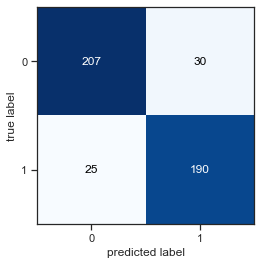

In [28]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(predictors_train, response_train)
predictions_test = random_forest.predict(predictors_test)
predictions_train = random_forest.predict(predictors_train)

conf_matrix = confusion_matrix(predictions_test, response_test)
plot_confusion_matrix(conf_matrix)

precision = precision_score(predictions_test, response_test)
recall = recall_score(predictions_test, response_test)

print("*****************************************")
print("Results on testing data:")
print("*****************************************")
print("Accuracy = "+str(accuracy_score(predictions_test, response_test)))
print("Precision = "+str(precision))
print("Recall = "+str(recall))

tpr, fpr, threshold = roc_curve(predictions_test, response_test, pos_label=1)
model_preds["Random Forest"] = [tpr, fpr]
print()
print("AUC value = "+str(auc(tpr, fpr)))

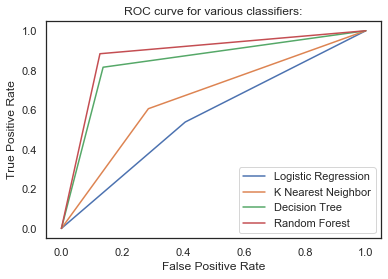

In [29]:
plt.title("ROC curve for various classifiers:")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

for key, value in model_preds.items():
    model_list = model_preds[key]
    plt.plot(model_list[0], model_list[1], label=key)
    plt.legend()
plt.show()

### Conclusions

From the above analysis it can be seen that Random Forest does the best job as seen by the area under the ROC courve